# Nonlinear Differential Equation: Van der Pol Oscillator
## Governing Equations
The Van der Pol oscillator is governed by the second-order nonlinear differential equation:

$$\frac{d^2x}{dt^2} - \mu(1-x^2)\frac{dx}{dt}+x=0$$

## or

$$ 
\begin{cases}
\dot{x}=y \\
\dot{y} = \mu(1-x^2)y-x
\end{cases}
$$
### where x is the position coordinate---which is a function of the time t, and μ is a scalar parameter indicating the nonlinearity and the strength of the damping.
### The system has a stable limit cycle. This limit cycle becomes increasingly sharp for higher values μ. 

### If $\mu=0$, the equation reduces to the equation of simple harmonic motion

 $$x^{''} + x = 0$$

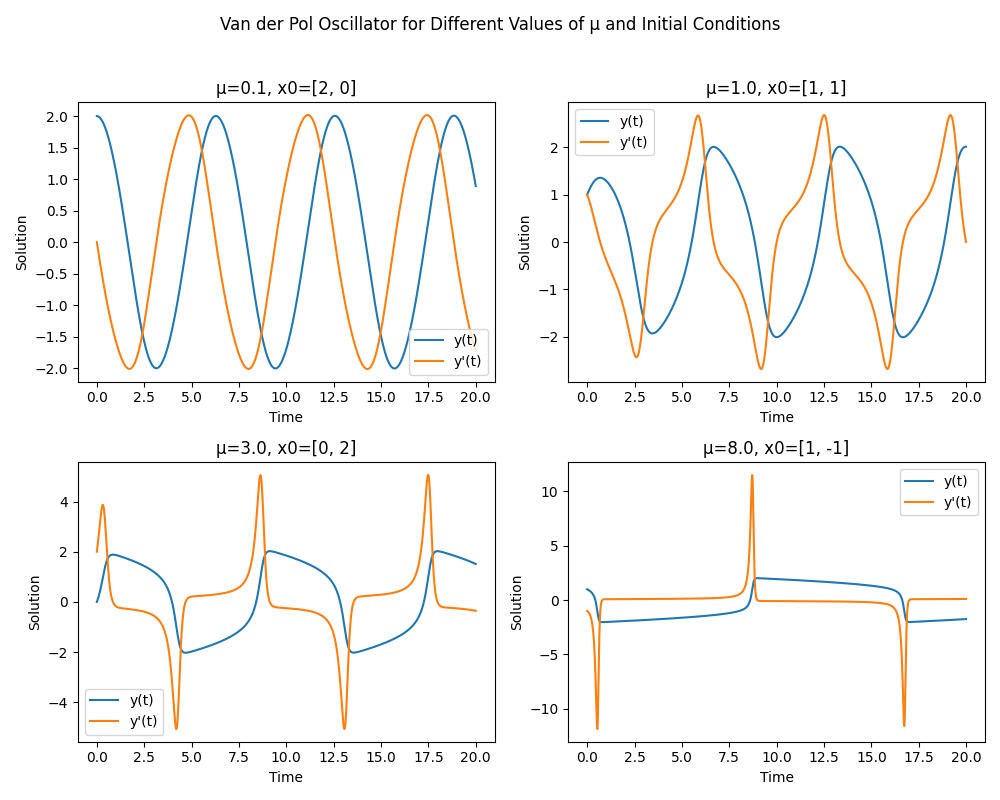

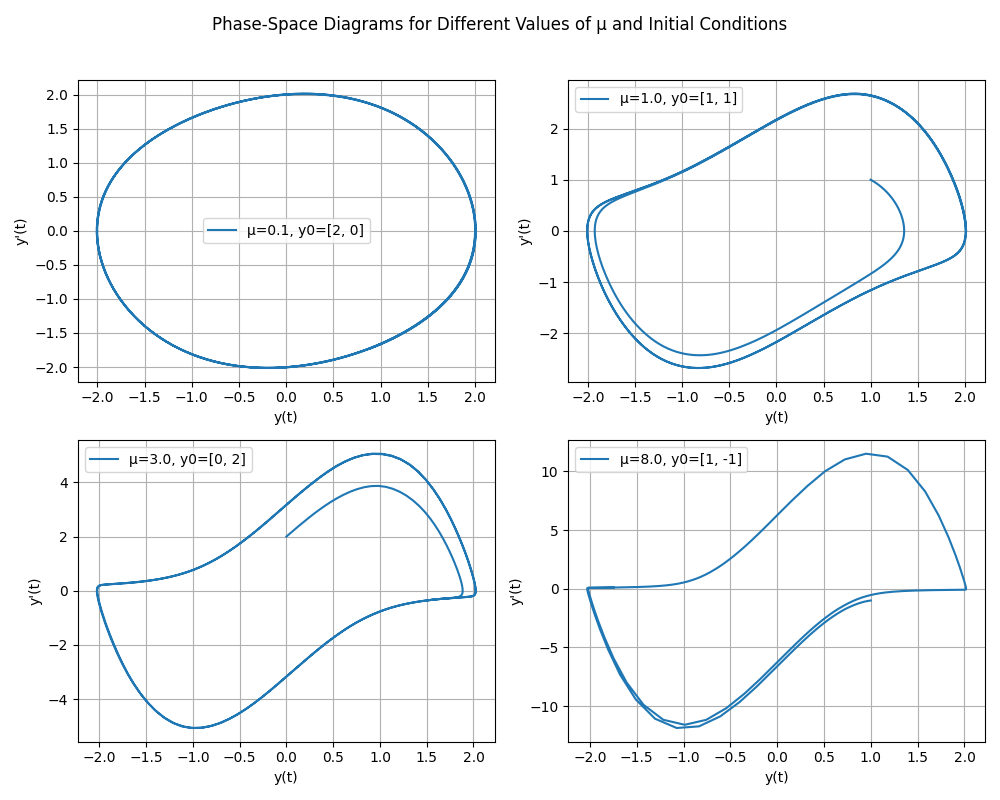

In [20]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def van_der_pol(t, y, mu):
    dydt = [y[1], mu * (1 - y[0]**2) * y[1] - y[0]]
    return dydt

# Define different values for mu and initial conditions
mus = [0.1, 1.0, 3.0, 8.0]
initial_conditions = [[2, 0], [1, 1], [0, 2], [1, -1]]

t_span = [0, 20]
t_eval = np.linspace(t_span[0], t_span[1], 1000)

fig, axs = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle('Van der Pol Oscillator for Different Values of μ and Initial Conditions')

for i, (mu, y0) in enumerate(zip(mus, initial_conditions)):
    sol = solve_ivp(van_der_pol, t_span, y0, args=(mu,), t_eval=t_eval)
    ax = axs[i // 2, i % 2]
    ax.plot(sol.t, sol.y[0], label='y(t)')
    ax.plot(sol.t, sol.y[1], label="y'(t)")
    ax.set_title(f'μ={mu}, x0={y0}')
    ax.set_xlabel('Time')
    ax.set_ylabel('Solution')
    ax.legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
#plt.show()

fig, axs = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle('Phase-Space Diagrams for Different Values of μ and Initial Conditions')

for i, (mu, y0) in enumerate(zip(mus, initial_conditions)):
    sol = solve_ivp(van_der_pol, t_span, y0, args=(mu,), t_eval=t_eval)
    ax = axs[i // 2, i % 2]
    ax.plot(sol.y[0], sol.y[1], label=f'μ={mu}, y0={y0}')
    ax.set_xlabel('y(t)')
    ax.set_ylabel("y'(t)")
    ax.legend()
    ax.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


# Save the figure
#plt.savefig('Van der Pol oscillator.jpg')

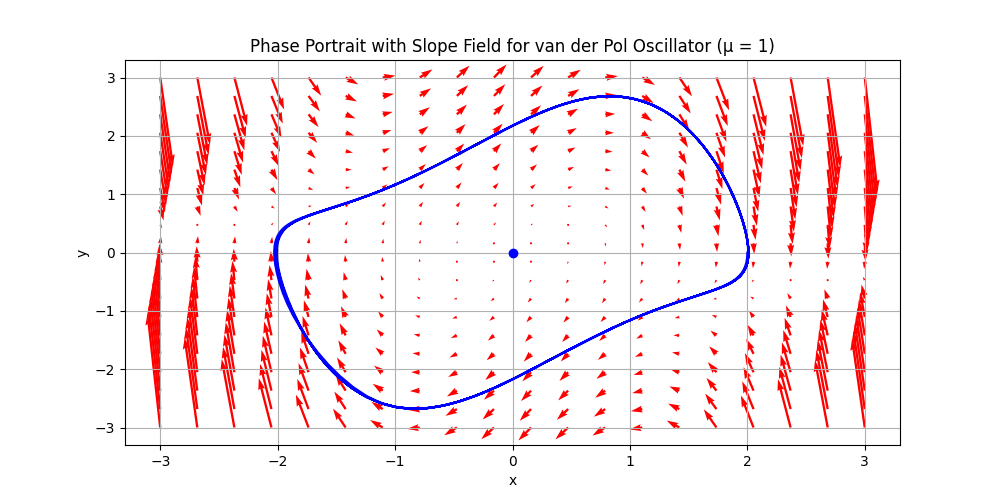

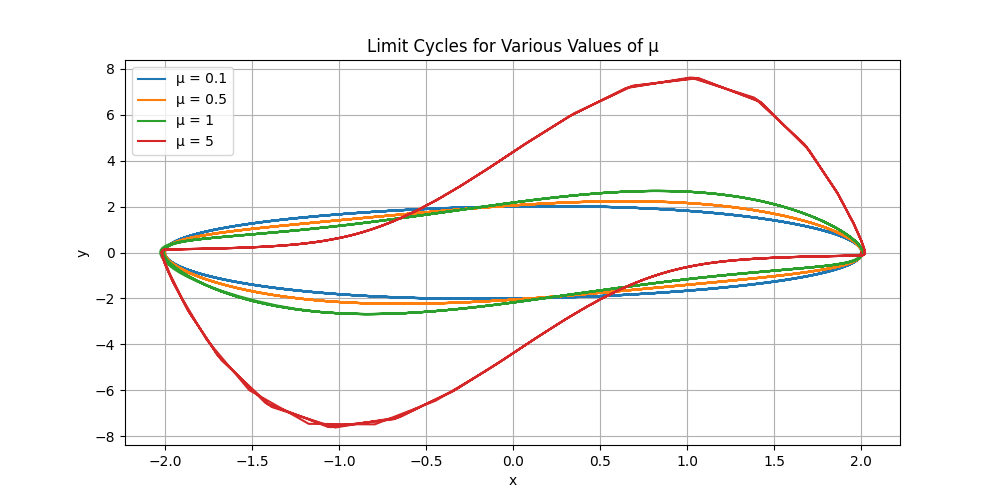

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Define the van der Pol oscillator differential equation
def van_der_pol(t, state, mu):
    x, y = state
    dxdt = y
    dydt = mu * (1 - x**2) * y - x
    return [dxdt, dydt]

# Generate the phase portrait with slope field using quiver
from scipy.integrate import solve_ivp

mu = 1.0
x = np.linspace(-3, 3, 20)
y = np.linspace(-3, 3, 20)
X, Y = np.meshgrid(x, y)
U, V = np.zeros(X.shape), np.zeros(Y.shape)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        U[i, j], V[i, j] = van_der_pol(0, [X[i, j], Y[i, j]], mu)

plt.figure(figsize=(10, 5))
plt.quiver(X, Y, U, V, color='r')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Phase Portrait with Slope Field for van der Pol Oscillator (µ = 1)')

# Highlight the limit cycle and the fixed point at (0, 0)
sol = solve_ivp(van_der_pol, [0, 50], [2, 0], args=(mu,), dense_output=True)
t = np.linspace(0, 50, 1000)
x, y = sol.sol(t)
plt.plot(x, y, 'b')
plt.plot(0, 0, 'bo')  # Fixed point
plt.grid()
plt.show()


# Plot the limit cycles for various values of µ
mu_values = [0.1, 0.5, 1, 5]
plt.figure(figsize=(10, 5))

for mu in mu_values:
    sol = solve_ivp(van_der_pol, [0, 50], [2, 0], args=(mu,), dense_output=True)
    x, y = sol.sol(t)
    plt.plot(x, y, label=f'µ = {mu}')
    
plt.xlabel('x')
plt.ylabel('y')
plt.title('Limit Cycles for Various Values of µ')
plt.legend()
plt.grid()
plt.show()
